# Motivation

The motivation of this project is to replicate the results of the [repository of Buffalo Capital Management](https://github.com/wzchen/stock_market_prediction) at 2013 and in the future see if markets are still predictable in 2021. The original Kaggle competition is [here](https://www.kaggle.com/c/boston-data-festival-hackathon).
 - Given the opening, closing, min, max, and volume of a stock in the previous 9 days (and given the opening price of a stock on day 10) can we predict the directional movement of a stock on day 10?
 
**Steps**

- Get the data
- Exploretoary analysis
- Model the time series data suing a machine learning model
- Applying the startegy on the backtest data to see how the strategy will perform

**Files**

We only use the training dataset of the original Kaggle competition since the Close price of the stocks are in the dataset so we can find the accuracy of our model.
The trainig dataset is then splitted to train, test and backtest datasets.
- **process.ipynb**: A Jupyter Notebook describing the process.
- **training.csv**: A csv file containing stock ID (StId), opening, closing, min, max, and volume of 94 stock in 500 days. The first opening date price is scaled to 1.


# Get the data

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('datasets/ohlc_data.csv')

In [63]:
data

,StId,O1,MA1,MI1,C1,V1,O2,MA2,MI2,C2,...,O499,MA499,MI499,C499,V499,O500,MA500,MI500,C500,V500
0,1,1,1.0163,0.99640,1.00000,1260000.0,1.00000,1.0055,0.99106,1.00000,...,0.89015,0.90284,0.87934,0.90097,3930000.0,0.90457,0.90457,0.88655,0.89015,1860000.0
1,2,1,1.0124,0.99160,0.99563,1720000.0,1.00400,1.0040,0.97882,0.98319,...,2.18490,2.18890,2.15970,2.18050,2890000.0,2.19730,2.20170,2.18050,2.18490,2040000.0
2,3,1,1.0000,0.98269,0.98269,335000.0,1.00430,1.0087,0.99135,0.99135,...,0.93184,0.94483,0.93184,0.93617,269000.0,0.93184,0.94050,0.91886,0.93184,395000.0
3,4,1,1.0152,1.00000,1.01030,227000.0,1.00490,1.0103,0.98441,1.00000,...,0.42043,0.44627,0.41017,0.44627,2370000.0,0.38966,0.41509,0.38433,0.41509,988000.0
4,5,1,1.0000,0.97850,0.97850,887000.0,0.98925,1.0056,0.98925,0.99486,...,1.28640,1.29630,1.27620,1.28640,1170000.0,1.27100,1.29160,1.26590,1.29160,969000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,90,1,1.0053,0.98497,0.98985,1780000.0,0.99513,1.0154,0.99513,1.01540,...,1.38100,1.42690,1.37610,1.42690,2320000.0,1.36600,1.40660,1.36600,1.39640,1470000.0
90,91,1,1.0000,0.96547,0.96547,701000.0,1.00510,1.0101,0.98527,0.99033,...,1.38720,1.40560,1.38260,1.40560,1390000.0,1.40560,1.40560,1.37800,1.38720,958000.0
91,92,1,1.0051,0.98542,0.98542,5620000.0,1.00990,1.0197,0.99527,0.99527,...,2.27630,2.34530,2.27630,2.32560,6600000.0,2.22700,2.29130,2.22230,2.28140,5040000.0
92,93,1,1.0098,0.99213,0.99417,3200000.0,1.00200,1.0098,0.99811,1.00200,...,0.93512,0.95087,0.93118,0.94882,4690000.0,0.92331,0.93701,0.92331,0.93307,4770000.0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 2501 entries, StId to V500
dtypes: float64(2499), int64(2)
memory usage: 1.8 MB


# Exploretory Data Analysis

Now let's see if the change of price in $n$ previuos days gives prediction power for the change of price in the $n+1$th day. We set $n=9$.

we only need open and close of every day:

In [65]:
import re

# we use regular expression to select MA, MI and V columns in data and drop them
data_cols = data.columns
r = re.compile("^[MA, MI, V]")
drop_cols = filter(r.match, data_cols)

In [66]:
data.drop(columns = drop_cols, axis=1, inplace=True)
data.set_index('StId', inplace=True)

How the closing price of the 94 stocks look like in 500 days?

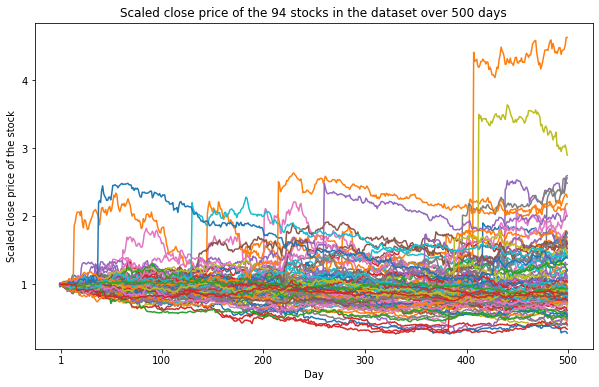

In [101]:
# we use regular expression to select Close columns in data
%matplotlib inline

r = re.compile("^C")
close_cols = filter(r.match, data_cols)
date_dis = np.linspace(1,500,6, dtype=int)
ax = data[close_cols].T.plot(figsize=(10,6), legend=False,
                        xticks=date_dis,
                        xlabel='Day', ylabel='Scaled close price of the stock', title='Scaled close price of the 94 stocks in the dataset over 500 days')
ax.set_xticklabels(date_dis)
plt.savefig('images/stocks_closePrice.png')

In [8]:
r = re.compile("^C")
close_cols = filter(r.match, data_cols)
close = data.loc[5, close_cols].T
close_renamed = close.rename(lambda s: s.strip("C"))#.plot(figsize=(10,6), legend=False)
close_renamed.index = close_renamed.index.astype('int64')
close_renamed

1      0.97850
2      0.99486
3      0.99486
4      0.98925
5      1.00560
        ...   
496    1.25090
497    1.24580
498    1.32660
499    1.28640
500    1.29160
Name: 5, Length: 500, dtype: float64

There are very big jumps on some days that are not explained in the kaggle competition or repository of Buffalo Capital Management.

We put 10 days data of stocks into a single dataframe to feed it into the machine learning algorithms.

In [9]:
memory_days = 10
num_cols = 2 # open and close columns
start_day = 1
last_day = 440 # from start_day to last_day, make 10 day windows. So 450 days for training and 50 days for backtesting
X_windows = [0] # X_windows are stored as days starts at day=1 (workaround)

# scale a dataframe so the first column (opening price) is 1.0
def scaler(df):
    for column in df.columns:
        df[column] = df[column] / df.iloc[:,0]
    return df

for day in range(start_day, last_day+1):
    # select the 10 day window
    rolling_window = data.iloc[:, day*num_cols-num_cols:(day+memory_days)*num_cols-num_cols]
    # scale data to 'O1' column
    rolling_window_scaled = scaler(rolling_window)
    X_windows.append(rolling_window_scaled)
    # set equal column names for all dataframe to concatenate
    X_windows[day].columns = X_windows[start_day].columns

# concatenate all 10 day windows in one dataframe
X_windows_list = [X_windows[day] for day in range(start_day, last_day+1)]    
X_windows_con = pd.concat(X_windows_list)    

In [10]:
# Split the data into train, test and backtest data. The train data is used in machine learning to fit the model and the test data is to ckeck the model on one signle 10 day window.
# The backtest data is used to check the strategy by using the prediction of the model.
n_stocks = 94
train_data = X_windows_con.iloc[:(last_day-1)*n_stocks, :]
test_data = X_windows_con.iloc[(last_day-1)*n_stocks:, :]
backtest_data = data.iloc[:, num_cols*(last_day+memory_days):]

In [11]:
train_data.head()

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,O6,C6,O7,C7,O8,C8,O9,C9,O10,C10
StId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.00000,1.00000,1.00000,1.00550,1.00000,0.98919,1.00550,0.98385,0.98919,0.98746,0.98385,0.98558,0.98746,1.00360,0.98558,1.00720,1.00360,1.01270,1.00720
2,1.0,0.99563,1.00400,0.98319,1.00400,1.00000,1.00400,1.00000,1.00400,1.00840,0.99563,0.99563,0.96639,0.98723,0.96639,0.97042,0.94958,0.97042,0.94118,0.95798
3,1.0,0.98269,1.00430,0.99135,0.98269,0.99567,1.00000,0.99135,0.98269,1.00000,0.97836,0.98269,0.98269,0.97404,0.99567,0.98702,0.98702,0.99567,0.98702,0.98269
4,1.0,1.01030,1.00490,1.00000,1.01520,1.01520,0.97949,1.01520,0.96390,0.97416,0.94832,0.95857,0.90771,0.94340,0.90238,0.90238,0.90238,0.90238,0.89746,0.91263
5,1.0,0.97850,0.98925,0.99486,1.00000,0.99486,1.00000,0.98925,1.00000,1.00560,1.01640,1.00000,1.01070,1.01070,1.01070,1.01070,1.02150,1.00560,1.00560,1.02150


In [12]:
test_data.head()

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,O6,C6,O7,C7,O8,C8,O9,C9,O10,C10
StId,,,,,,,,,,,,,,,,,,,,
1,1.0,0.98558,0.98198,0.99827,1.01630,0.98025,1.01440,1.01630,1.01440,1.01440,1.01800,1.01630,1.02160,1.01800,1.04150,1.02160,1.04510,1.05050,1.02520,1.04510
2,1.0,2.01680,2.05040,2.03360,2.03800,2.04200,2.07160,2.02960,2.05480,2.07160,2.05040,2.05040,2.04640,2.05040,2.06720,2.04200,2.06320,2.06320,2.10080,2.05040
3,1.0,0.81608,0.86765,0.85900,0.86332,0.86332,0.86332,0.86765,0.86765,0.86332,0.85467,0.85900,0.85467,0.85034,0.84169,0.85034,0.85467,0.84169,0.85034,0.85467
4,1.0,0.40484,0.39459,0.42043,0.39459,0.39992,0.39992,0.39992,0.39459,0.39459,0.39992,0.39992,0.39992,0.40484,0.41017,0.40484,0.41509,0.41017,0.42576,0.42043
5,1.0,1.00840,1.05420,1.03410,1.04390,1.04390,1.03930,1.04390,1.06960,1.04910,1.08460,1.06960,1.06960,1.09490,1.06450,1.07430,1.10510,1.05930,1.12520,1.10510


In [13]:
backtest_data.head()

,O451,C451,O452,C452,O453,C453,O454,C454,O455,C455,...,O496,C496,O497,C497,O498,C498,O499,C499,O500,C500
StId,,,,,,,,,,,,,,,,,,,,,
1,1.01440,1.01630,1.01440,1.01440,1.01270,1.01440,1.03070,1.01270,1.02710,1.03070,...,0.98025,0.99467,0.96757,0.98025,0.90097,0.96757,0.89015,0.90097,0.90457,0.89015
2,2.02960,2.05040,2.02120,2.02960,2.01280,2.01680,2.03360,2.02120,1.99600,2.02120,...,2.10080,2.10520,2.11760,2.09240,2.21850,2.14290,2.18490,2.18050,2.19730,2.18490
3,0.85034,0.84169,0.84602,0.84169,0.84602,0.84169,0.86332,0.84602,0.84602,0.84169,...,0.99207,0.99207,0.94915,0.99639,0.94483,0.94915,0.93184,0.93617,0.93184,0.93184
4,0.39992,0.41509,0.39992,0.39992,0.39992,0.39459,0.38433,0.39992,0.38966,0.38966,...,0.43068,0.42576,0.42576,0.42576,0.44627,0.42043,0.42043,0.44627,0.38966,0.41509
5,1.12520,1.12520,1.13040,1.12520,1.13040,1.13040,1.09490,1.12010,1.10000,1.09490,...,1.24070,1.25090,1.30650,1.24580,1.29160,1.32660,1.28640,1.28640,1.27100,1.29160


In [14]:
# remove 10th day close column of test data
X_test = test_data.drop(columns = ['C10'])

# set the upward change in price as 1 and the downward as 0
y_test = (test_data.loc[:,'C10'] > test_data.loc[:,'O10']).astype('uint8')

In [15]:
# We set 9 days data to be the predictor of the 10th day
X_train = train_data.drop(columns = ['C10'])

# set the upward change in price as 1 and the downward as 0
y_train = (train_data.loc[:,'C10'] > train_data.loc[:,'O10']).astype('uint8')

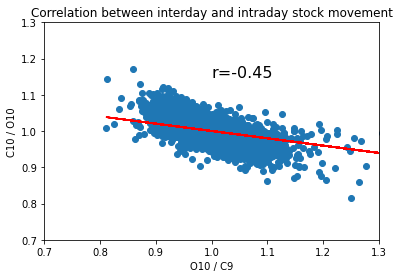

In [16]:
# find the correlation between the interday and intraday stock movement
x = train_data.loc[:,'O10']/train_data.loc[:,'C9']
y = train_data.loc[:,'C10']/train_data.loc[:,'O10']

m, b = np.polyfit(x, y, 1)
r = y.corr(x)
plt.scatter(x, y)
plt.plot(x, m*x+b, '-r')
plt.text(1,1.15, 'r={:.2f}'.format(r), fontsize=16)
plt.xlim((.7,1.3))
plt.ylim((.7,1.3))
plt.xlabel("O10 / C9")
plt.ylabel("C10 / O10")
plt.title("Correlation between interday and intraday stock movement")
plt.savefig('images/correlation_interday_intraday.png')
plt.show()

The big jumps in some days as we saw in the first figure casues the correltaion (r) to be less negative. We can see the outliers if we zoom out.

(0.2, 4.3)

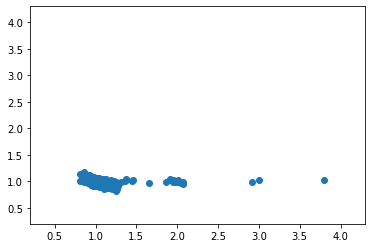

In [17]:
plt.scatter(x, y)
plt.xlim((.2,4.3))
plt.ylim((.2,4.3))

In an ideal case, we should find the reason and correct or clean the dataset. At this phase, we let them stay in the dataset.

# Model

we simply choose the random forset model at this stage of the project.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics,preprocessing
from sklearn.model_selection import cross_val_predict

In [19]:
forest_clf = RandomForestClassifier(random_state=42)
params = forest_clf.get_params()
print(params)
y_predict = cross_val_predict(forest_clf, X_train, y_train, cv=5)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


let's look at confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_predict)

In [21]:
# normalize confusion matrix
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

array([[0.86639906, 0.13360094],
       [0.25671772, 0.74328228]])

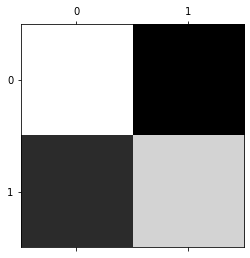

In [22]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [23]:
from sklearn.metrics import f1_score

f1_score(y_train, y_predict)

0.778234320607202

Another metric would be AUC.

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

roc_measure = False
if roc_measure == True:
    y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=5, method="predict_proba")
    y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
    fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

    # Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as well to see how they compare
    plt.plot(fpr_forest, tpr_forest, label="Random Forest")
    plt.legend(loc="lower right")
    plt.show()
    
    roc_auc_score(y_train, y_scores_forest)

And finally we fit the model.

In [25]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

And finally saving the model.


In [26]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(forest_clf, pickle_out) 
pickle_out.close()

# Predict on the test set

In [27]:
y_pred = forest_clf.predict(X_test)

In [28]:
conf_mx_test = confusion_matrix(y_test, y_pred)
conf_mx_test

array([[44,  4],
       [14, 32]])

In [29]:
# normalize confusion matrix
row_sums = conf_mx_test.sum(axis=1, keepdims=True)
norm_conf_mx_test = conf_mx_test / row_sums
norm_conf_mx_test

array([[0.91666667, 0.08333333],
       [0.30434783, 0.69565217]])

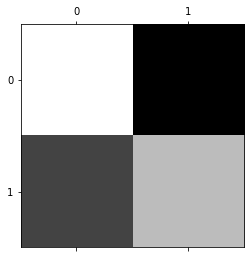

In [30]:
plt.matshow(norm_conf_mx_test, cmap=plt.cm.gray)
plt.show()

In [31]:
f1_score(y_test, y_pred)

0.7804878048780488

In [32]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0], dtype=uint8)

In [33]:
StID = range(1,len(y_pred)+1)
predictions = pd.DataFrame(y_pred, columns=['movement'], index=StID)

In [39]:
predictions.head(10)

,movement
1,1
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,1
10,1


In [35]:
predictions.to_csv('predictions/predictions.csv')

# Applying the strategy

Now we test our model on backtest dataset.

To draw the profit/loss over time, we use the `trade_stat_logger` library (source:[here](https://github.com/shilewenuw/trade_stat_logger)).

At each day, if the model predicts an increase in price, we buy at opening and sell at close.

In [36]:
from trade_stat_logger.logger import SimpleLogger

logger = SimpleLogger()

backtest_days = np.arange(memory_days, len(backtest_data.columns)/2, 1, dtype=int)

for day in backtest_days:
    # get the close and open of 9 days and the 10th day open
    X_backtest = backtest_data.iloc[:, 2*(day-memory_days):2*day-1]
    
    # predict the 10th close
    y_predict_10 = forest_clf.predict(X_backtest)
    
    # apply the strategy to all tickers in dataset in that specific day
    for index, rows in X_backtest.iterrows():
        share_price_open = backtest_data.iloc[index-1, 2*day-2]
        share_price_close = backtest_data.iloc[index-1, 2*day-1]
        # if the 10th close is higher than open, then buy. if it's lower, do nothing (no short selling for now)
        if y_predict_10[index-1] == 1:
            logger.log(security = index, shares = 1, share_price = share_price_open)
            logger.log(security = index, shares = -1, share_price = share_price_close)

/home/motare/.local/lib/python3.9/site-packages/trade_stat_logger/logger.py:115: UserWarning: For most accurate performance results, please clear all holdings, which you can do with clear_all_positions()
  warn('For most accurate performance results, please clear all holdings, which you can do with clear_all_positions()')


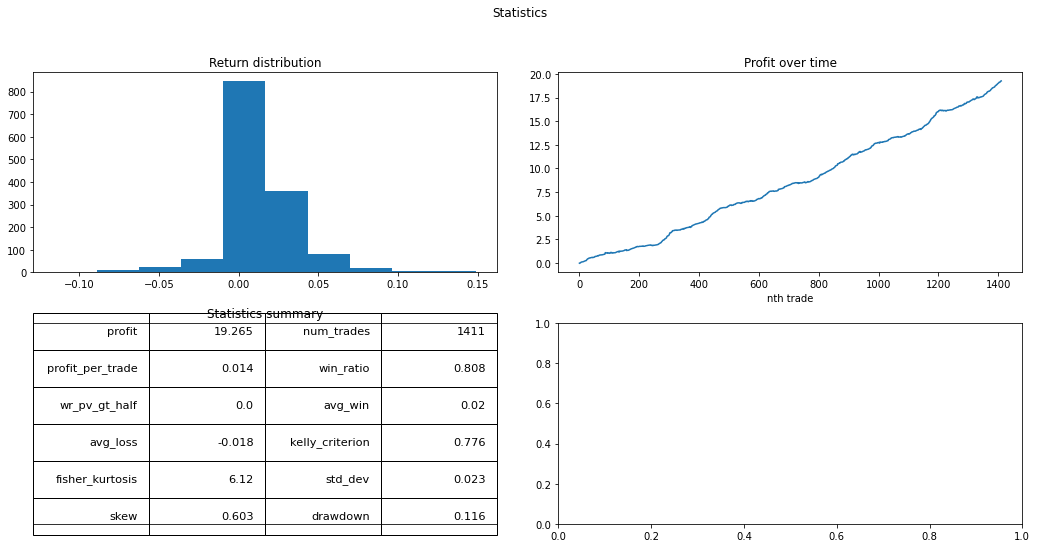

In [37]:
# Analyze the performance of the strategy
logger.graph_statistics(show_window=False)
plt.savefig('./images/graph_statistics.png')

# Next steps
- Comparing multiple machine learing models and the accuracies
- What happens if we change the number of prvoius days (n) from 10 to other numbers?
- Is there subsets of data that represents industries with correlations? How would dividing the dataset change the perfomance of the model?
- Will tuning the hyperparameteres improve the model?
- What is the predictive power of the model applied to the recent years of the US and and other countries data?

It is also interesting to see how the model perform on realtime data using APIs of the brokerages (IBKR, Robinhood, Wealthsimple).

# Conclusions

The directional movement of the stock market looks predictble, but there are some notes to consider. 
The Buffalo Capital Management states three points, and we look at them here and see how we can mitigate theese issues.
1. Magnitude: We did not predict the magnitude of the profit/loss direction. If loss magnitudes are biger than the profits, the profits are wiped out. It seems that we have to expect to have a bullish market in the time we employ our strategy so overall we don't lose big. But how can we know the market is bullish? 
2. Things can go wrong very fast: The high accuracy of the prediction does not mean the high accuracy of the profitability. Our model might be 90% accuarate, but one error make us lose big. To mitigate this issue, we should have an exit strategy in place all the time.
3. Transaction fees: The advent of commidsion-free trading brokers in recent years makes more frequent trading strategies promising so transaction fees might not be an issue anymore. But there are concerns about the competitiveness of the price compared to non-free brokers.
